### Startups Profite Regression System

A multi-linear regression system to estimate the profit of startups in three states in America.

#### Independent variables are

- R&D Spend
- Administration
- Marketing Spend
- State,Profit

#### Dependent variables include 
- Profit

This project's dataset is available for download at this link  [Dataset](https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv)

#### Tools

To work with this project, multiple libraries and frameworks need to be installed. The following is a list of them.

- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [scikit-learn](https://scikit-learn.org/stable/)

#### Code implemention

Import the main packets for the project

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Take a look at the dataset

In [10]:
df = pd.read_csv("dataset.csv")

Select the columns for training and testing
Select the first four columns as independent variables (x)

In [11]:
x = df.iloc[:, :4]

Select the last column as a dependent variable (y)

In [12]:
y = df.iloc[:, 4]

The categorical variable is converted using onehotencoder, and the reset is performed using standardScaler

In [13]:
col_transformer = make_column_transformer((OneHotEncoder(), ['State']),remainder=StandardScaler())

x = col_transformer.fit_transform(x)

Select 80% for training and 20% for testing

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

call the linear regression and compute the results

In [16]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_pred = linreg.predict(x_test)
y_pred[:3]

array([103015.20159796, 132582.27760816, 132447.73845174])

#### Compute the Accuracy

 Accuracy of the model is 93.47


Text(0, 0.5, 'Predicted')

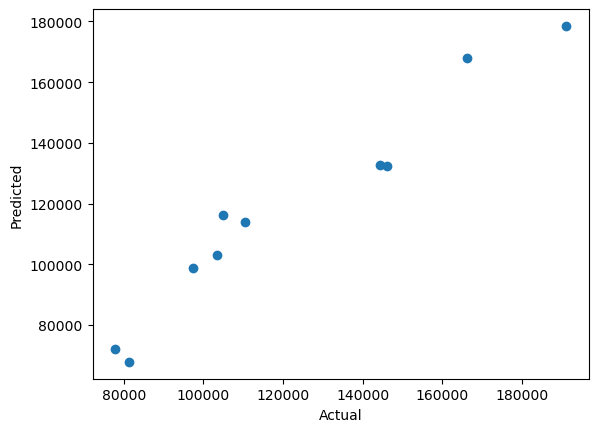

In [17]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

 #### Export the model
 <hr>

```sh
import joblib

import os

if not os.path.exists('Model'):
        os.mkdir('Model')
if not os.path.exists('Scaler'):
        os.mkdir('Scaler')

joblib.dump(model, r'Model/model.pickle') 
joblib.dump(col_transformer, r'Scaler/scaler.pickle')

```
<hr>

Using the exported model for new data

<hr>

```sh
import joblib
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')


import pandas as pd
new_data = pd.DataFrame([{'R&D Spend':'155349.2', 'Administration':'126897.8', 'Marketing Spend':'471784.1', 'State':'New York'},{'R&D Spend':'165349.2', 'Administration':'136897.8', 'Marketing Spend':'471784.1', 'State':'New York'}])

# new_data = pd.DataFrame([])


new_data = new_data[['R&D Spend','Administration','Marketing Spend','State']]

print(new_data)

# Normalize and add the missing values automatically
new_data = scaler.transform(new_data)

pre = model.predict(new_data)

print(pre)

```

<hr>

#### Results

<hr>

![delay](https://user-images.githubusercontent.com/30151596/201482255-53bc6945-a384-4524-b5cc-734b818b8036.png)
![Figure_1](https://user-images.githubusercontent.com/30151596/201482262-7b3766f3-0dd1-41dc-acb5-4c9b8fcf21c8.png)

#### Consulusion


The aim of the work is to propose a multi-regression machine learning system to predict the profit of startup companies in the United States. Two, three, and four independent variables are used in the experiment. The performance of the system is calculated using two metrics: the R2 score and the processing latency. In general, the findings indicate that increasing the number of independent variables does not improve performance. As demonstrated in the graph, when comparing three and four independent variables, the r2 score of employing just two generates more accurate data. When the processing time is included, the result demonstrates a rise in the number of independent variables, leading to an increase in processing time for all stimulation.